# Analisis Decision Tree

### Import Modul

In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Import Data

In [2]:
d_train = pd.read_csv('/Users/user/Downloads/AI/train.csv')
d_test = pd.read_csv('/Users/user/Downloads/AI/test.csv')

print (d_train.shape)
print (d_test.shape)

(891, 12)
(418, 11)


In [3]:
d_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
d_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Mempersiapkan Data Train

In [5]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 ### Atribut "Passenger ID", "Name", dan "Ticket" dihapus karena tidak diperlukan

In [6]:
d_train.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
d_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
print('Jumlah nilai yang hilang dari atribut survived :', d_train.Survived.isnull().sum())
print('Jumlah nilai yang hilang dari atribut pclass :', d_train.Pclass.isnull().sum())
print('Jumlah nilai yang hilang dari atribut sex :', d_train.Sex.isnull().sum())
print('Jumlah nilai yang hilang dari atribut age :', d_train.Age.isnull().sum())
print('Jumlah nilai yang hilang dari atribut sibsp :', d_train.SibSp.isnull().sum())
print('Jumlah nilai yang hilang dari atribut parch :', d_train.Parch.isnull().sum())
print('Jumlah nilai yang hilang dari atribut fare :', d_train.Fare.isnull().sum())
print('Jumlah nilai yang hilang dari atribut cabin :', d_train.Cabin.isnull().sum())
print('Jumlah nilai yang hilang dari atribut embarked :', d_train.Embarked.isnull().sum())

Jumlah nilai yang hilang dari atribut survived : 0
Jumlah nilai yang hilang dari atribut pclass : 0
Jumlah nilai yang hilang dari atribut sex : 0
Jumlah nilai yang hilang dari atribut age : 177
Jumlah nilai yang hilang dari atribut sibsp : 0
Jumlah nilai yang hilang dari atribut parch : 0
Jumlah nilai yang hilang dari atribut fare : 0
Jumlah nilai yang hilang dari atribut cabin : 687
Jumlah nilai yang hilang dari atribut embarked : 2


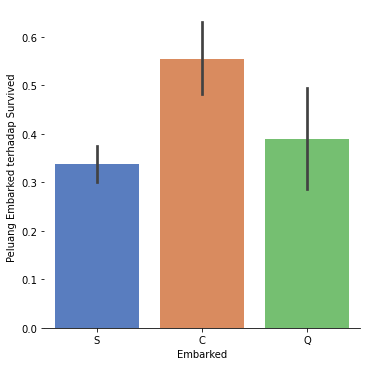

In [8]:
hst_embarked = sns.catplot(x='Embarked', y='Survived', 
                           data=d_train, height=5, kind='bar', palette='muted')

hst_embarked.despine(left=True)
hst_embarked = hst_embarked.set_ylabels('Peluang Embarked terhadap Survived')

In [9]:
d_train = d_train.fillna({'Embarked':'C'})
print('Jumlah nilai yang kosong dari atribut embarked', d_train.Embarked.isnull().sum())

Jumlah nilai yang kosong dari atribut embarked 0


In [10]:
d_train = d_train.fillna({'Cabin':'X'})
d_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,X,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,X,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,X,S


In [11]:
d_train['Cabin'] = d_train['Cabin'].str.slice(0,1)

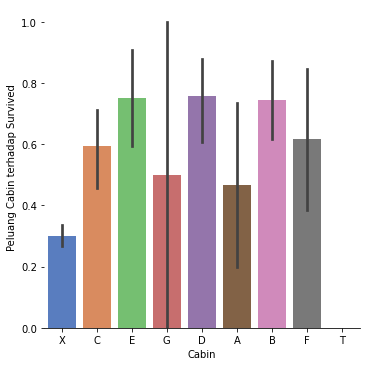

In [12]:
hst_cabin = sns.catplot(x='Cabin', y='Survived', 
                           data=d_train, height=5, kind='bar', palette='muted')

hst_cabin.despine(left=True)
hst_cabin = hst_cabin.set_ylabels('Peluang Cabin terhadap Survived')

In [13]:
d_train['Cabin'] = d_train['Cabin'].replace(['A','B','C','D','E','F','G','T','X'],[0,1,2,3,4,5,6,7,8])
d_train['Embarked'] = d_train['Embarked'].replace(['S','C','Q'],[0,1,2])
d_train['Sex'] = d_train['Sex'].replace(['male','female'],[0,1])
d_train['Age'] = d_train['Age'].fillna(d_train['Age'].mean())
print('jumlah nilai yang hilang dari atribut age :', d_train.Age.isnull().sum())

jumlah nilai yang hilang dari atribut age : 0


In [14]:
Y = d_train.Survived
X = d_train
X.drop(['Survived'],axis = 1, inplace = True)

In [15]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X,Y,test_size=0.3,random_state=42)
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X,Y,test_size=0.4,random_state=42)
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X,Y,test_size=0.4,random_state=42)

### Decision Tree

In [16]:
model1 = tree.DecisionTreeClassifier(max_depth=2)
model1.fit(X_train1, Y_train1)
model2 = tree.DecisionTreeClassifier(max_depth=4)
model2.fit(X_train2, Y_train2)
model3 = tree.DecisionTreeClassifier(max_depth=6)
model3.fit(X_train3, Y_train3)
model4 = tree.DecisionTreeClassifier(max_depth=8)
model4.fit(X_train4, Y_train4)
model5 = tree.DecisionTreeClassifier(max_depth=10)
model5.fit(X_train5, Y_train5)

DecisionTreeClassifier(max_depth=10)

In [18]:
y_pred1 = model1.predict(X_test1)
y_pred2 = model2.predict(X_test2)
y_pred3 = model3.predict(X_test3)
y_pred4 = model4.predict(X_test4)
y_pred5 = model5.predict(X_test5)

acc1 = accuracy_score(y_pred1,Y_test1)
acc2 = accuracy_score(y_pred2,Y_test2)
acc3 = accuracy_score(y_pred3,Y_test3)
acc4 = accuracy_score(y_pred4,Y_test4)
acc5 = accuracy_score(y_pred5,Y_test5)

acc_test = [acc1, acc2, acc3, acc4, acc5]
print(acc_test)

[0.7653631284916201, 0.7988826815642458, 0.7723880597014925, 0.7450980392156863, 0.742296918767507]


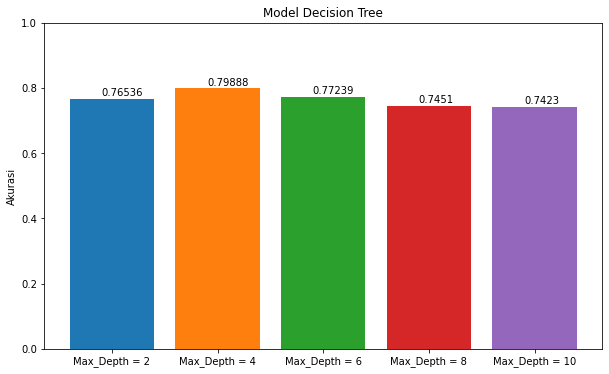

In [19]:
plt.figure(figsize=(10,6))
xlabels = ["Max_Depth = 2", "Max_Depth = 4", 
           "Max_Depth = 6", "Max_Depth = 8", "Max_Depth = 10"]
for i in range(len(xlabels)):
    plt.bar(xlabels[i], acc_test[i])
    plt.text(i-0.1, acc_test[i]+0.01, round(acc_test[i], 5))

plt.ylim([0,1])
plt.title("Model Decision Tree")
plt.ylabel("Akurasi")
plt.show()